In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib


from analysis_plot_kit.core import fig_generator

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_12596\3813485089.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read in data
data_property_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\data_property_sea.csv')
data_property_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\data_property_nacl.csv')
data_property_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\data_property_simple.csv')
data_property_reatoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\data_property_reaktoro.csv')
# Feed TDS,Temperature,Enthalpy,Vap Pressure,Osmotic Pressure,Density

In [3]:
# find errors and create dataframe
results_col = ["Osmotic Pressure", "Density"] # "Enthalpy", "Vap Pressure", 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = pd.DataFrame(abs(data_property_reatoro[i] - data_property_seawater[i]) / data_property_reatoro[i]) * 100
    error_nacl[i] = pd.DataFrame(abs(data_property_reatoro[i] - data_property_nacl[i]) / data_property_reatoro[i]) * 100
    error_simple[i] = pd.DataFrame(abs(data_property_reatoro[i] - data_property_simple[i]) / data_property_reatoro[i]) * 100

    

In [4]:
xticks = ([3.436420e+04/1e3, 5.00e+04/1e3, 1.0e+05/1e3, 1.2e+05/1e3, 2.0e+05/1e3])
yticks = np.linspace(
    min(data_property_nacl["Temperature"])- 273.15, max(data_property_nacl["Temperature"])- 273.15, 6
)
xticks = np.around(xticks, decimals=1)
yticks = np.around(yticks, decimals=0)

[ 34.3642  50.     100.     120.     200.    ] [25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85.]
[2.28961742e-03 1.00000000e+00 2.00000000e+00 3.00000000e+00
 4.00000000e+00]
tiks [ 0. 12. 24. 36. 48. 60.]
[ 34.3642  50.     100.     120.     200.    ] [25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85.]
[2.28961742e-03 1.00000000e+00 2.00000000e+00 3.00000000e+00
 4.00000000e+00]
tiks [ 0. 12. 24. 36. 48. 60.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_12596\2111521253.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_12596\2111521253.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


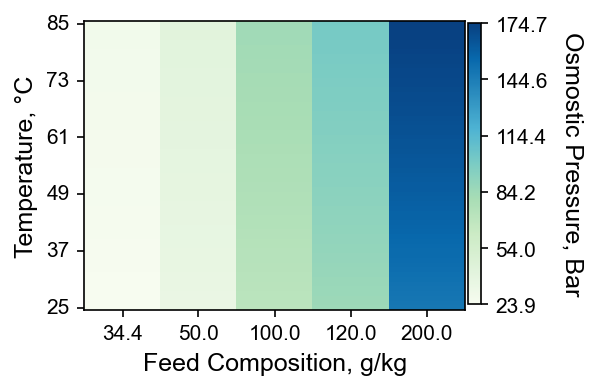

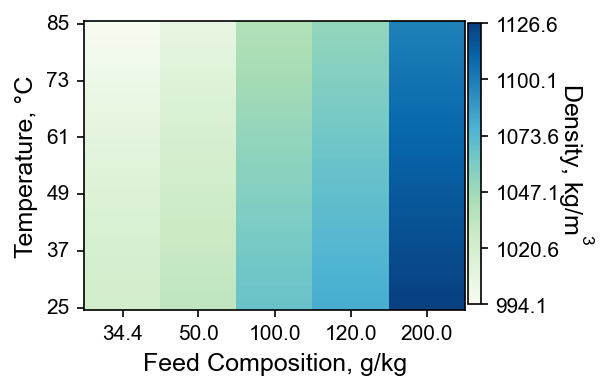

In [9]:

vmin = np.min(data_property_reatoro["Osmotic Pressure"])/1e5
vmax = np.max(data_property_reatoro["Osmotic Pressure"])/1e5

zticks = np.linspace(vmin, vmax, 6)
figure = fig_generator.figureGenerator()
figure.init_figure(width=3.5, height=2.5)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.plot_map(
    xdata=data_property_reatoro["# Feed TDS"] /1000,
    ydata=data_property_reatoro["Temperature"] - 273.15,
    zdata=data_property_reatoro["Osmotic Pressure"]/1e5,
    text=False,
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zlabel="Osmostic Pressure, Bar")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed Composition, g/kg",
    ylabel="Temperature, °C",
)
figure.save_fig(name="plot_reaktoro_osm_p")

vmin = np.min(data_property_reatoro["Density"])
vmax = np.max(data_property_reatoro["Density"])

zticks = np.linspace(vmin, vmax, 6)
figure = fig_generator.figureGenerator()
figure.init_figure(width=3.5, height=2.5)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.plot_map(
    xdata=data_property_reatoro["# Feed TDS"] /1000,
    ydata=data_property_reatoro["Temperature"] - 273.15,
    zdata=data_property_reatoro["Density"],
    text=False,
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zlabel="Density, kg/m$^{3}$")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed Composition, g/kg",
    ylabel="Temperature, °C",
)
figure.save_fig(name="plot_reaktoro_dens")

In [16]:
def colormap_prop_error(data, error_data, xticks, yticks, i = "Osmotic Pressure", file_name="file"):
    vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i]), np.min(error_simple[i])])
    vmax = np.max([np.max(error_sea[i]), np.max(error_nacl[i]), np.max(error_simple[i])])
    zticks = np.linspace(vmin, vmax, 6)
    figure = fig_generator.figureGenerator()
    figure.init_figure(width=3.5, height=2.5)
    figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)
    figure.plot_map(
        xdata=data["# Feed TDS"] *1000,
        ydata=data["Temperature"] - 273.15,
        zdata=error_data[i],
        text=False,
        build_map=True,
        vmin=vmin,
        vmax=vmax,
    )
    figure.add_colorbar(zticks=zticks, zlabel="% error, " + i)
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Feed Composition, g/kg",
        ylabel="Temperature, °C",
    )
    figure.save_fig(name=file_name)

[ 34.3642  50.     100.     120.     200.    ] [25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85.]
[2.28961742e-03 1.00000000e+00 2.00000000e+00 3.00000000e+00
 4.00000000e+00]
tiks [ 0. 12. 24. 36. 48. 60.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_12596\1597432297.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


[ 34.3642  50.     100.     120.     200.    ] [25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85.]
[2.28961742e-03 1.00000000e+00 2.00000000e+00 3.00000000e+00
 4.00000000e+00]
tiks [ 0. 12. 24. 36. 48. 60.]
[ 34.3642  50.     100.     120.     200.    ] [25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_12596\1597432297.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)
C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_12596\1597432297.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


[2.28961742e-03 1.00000000e+00 2.00000000e+00 3.00000000e+00
 4.00000000e+00]
tiks [ 0. 12. 24. 36. 48. 60.]


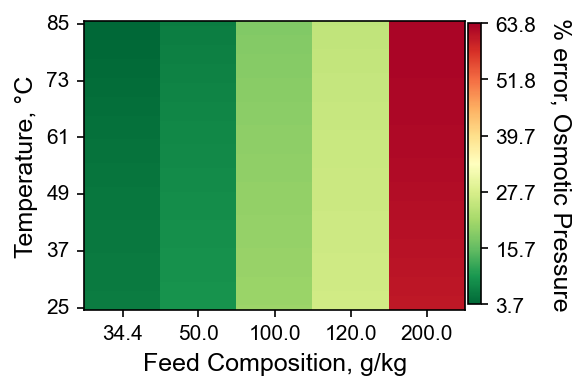

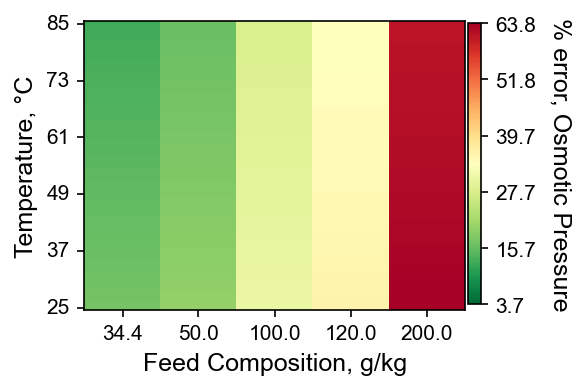

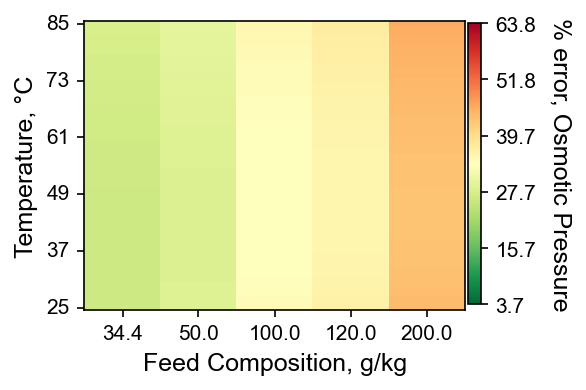

In [17]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks,"Osmotic Pressure", "plot_sea_Osm_P")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, "Osmotic Pressure", "plot_nacl_Osm_P")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, "Osmotic Pressure", "plot_simple_Osm_P")

[ 34.3642  50.     100.     120.     200.    ] [25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85.]
[2.28961742e-03 1.00000000e+00 2.00000000e+00 3.00000000e+00
 4.00000000e+00]
tiks [ 0. 12. 24. 36. 48. 60.]
[ 34.3642  50.     100.     120.     200.    ] [25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85.]
[2.28961742e-03 1.00000000e+00 2.00000000e+00 3.00000000e+00
 4.00000000e+00]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_12596\1597432297.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)
C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_12596\1597432297.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


tiks [ 0. 12. 24. 36. 48. 60.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_12596\1597432297.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


[ 34.3642  50.     100.     120.     200.    ] [25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85.]
[2.28961742e-03 1.00000000e+00 2.00000000e+00 3.00000000e+00
 4.00000000e+00]
tiks [ 0. 12. 24. 36. 48. 60.]


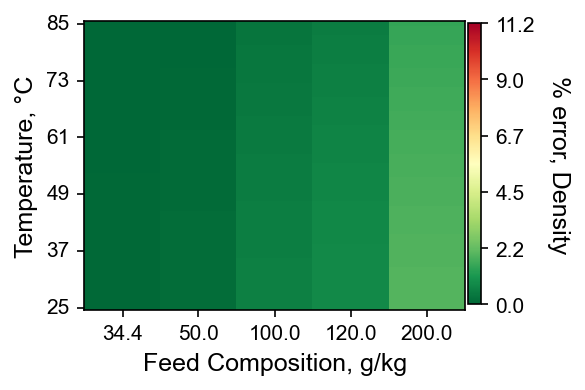

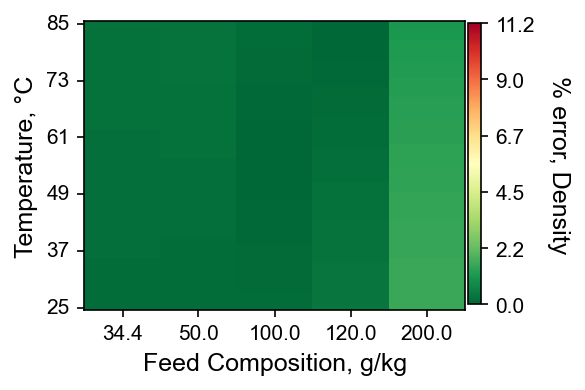

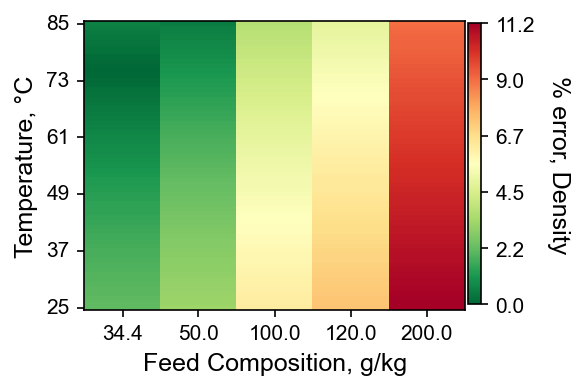

In [18]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks,"Density", "plot_sea_dens")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, "Density", "plot_nacl_dens")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, "Density", "plot_simple_dens")